In [1]:
from quantopian.research import symbols, run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import Fundamentals, USEquityPricing
from quantopian.pipeline.filters import StaticAssets
from quantopian.pipeline.factors import AverageDollarVolume, SimpleMovingAverage

stock_choices = ['DIS', 'GS', 'FB', 'V', 'AAPL', 'AMZN', 'NKE', 'GOOG', 'LMT']

In [2]:
def make_pipeline():    
    # Choose subset of stocks that were chosen during my class simulation
    portfolio = StaticAssets(symbols(stock_choices))
    
    prices = USEquityPricing.close.latest
    pe_ratio = Fundamentals.pe_ratio.latest
    dollar_volume_traded_1w = AverageDollarVolume(window_length=6)
            
    return Pipeline(
        columns= {
            'Price': prices,
            'P/E Ratio': pe_ratio,
            '1W MA Volume': dollar_volume_traded_1w
        },
        screen=portfolio
    )

In [3]:
# Portfolio start date was actually 2019-09-16
start_date = '2018-11-20'
end_date = '2019-11-20'

# Generate pipeline for notebook research
simulation_df = run_pipeline(make_pipeline(), start_date, end_date)
simulation_df

1W MA Volume  P/E Ratio  \
2018-11-20 00:00:00+00:00 Equity(24 [AAPL])     7.027325e+09  15.605374   
                          Equity(2190 [DIS])    6.037430e+08  14.518239   
                          Equity(5328 [NKE])    3.670632e+08  57.102362   
                          Equity(12691 [LMT])   2.442904e+08  27.896780   
                          Equity(16841 [AMZN])  5.455047e+09  84.674692   
                          Equity(20088 [GS])    8.794185e+08  14.048193   
                          Equity(35920 [V])     8.080780e+08  30.488688   
                          Equity(42950 [FB])    3.044509e+09  19.811747   
                          Equity(46631 [GOOG])  8.836660e+08  38.273921   
2018-11-21 00:00:00+00:00 Equity(24 [AAPL])     7.288646e+09  14.859782   
                          Equity(2190 [DIS])    6.736289e+08  14.071698   
                          Equity(5328 [NKE])    4.017482e+08  56.000000   
                          Equity(12691 [LMT])   2.438003e+08  27.827652   
                          Equity(16841 [AMZN])  5.970631e+09  83.732363   
                          Equity(20088 [GS])    6.973912e+08  13.560595   
                          Equity(35920 [V])     8.721513e+08  30.174208   
                          Equity(42950 [FB])    3.456342e+09  19.944277   
                          Equity(46631 [GOOG])  9.785991e+08  38.490056   
2018-11-23 00:00:00+00:00 Equity(24 [AAPL])     6.849533e+09  14.842989   
                          Equity(2190 [DIS])    6.995140e+08  14.217610   
                          Equity(5328 [NKE])    4.307294e+08  56.984252   
                          Equity(12691 [LMT])   2.484690e+08  27.868371   
                          Equity(16841 [AMZN])  5.911131e+09  84.923292   
                          Equity(20088 [GS])    6.122901e+08  13.649894   
                          Equity(35920 [V])     8.905679e+08  30.411765   
                          Equity(42950 [FB])    3.653554e+09  20.304217   
                          Equity(46631 [GOOG])  9.888048e+08  38.934709   
2018-11-26 00:00:00+00:00 Equity(24 [AAPL])     5.862627e+09  14.465995   
                          Equity(2190 [DIS])    6.383716e+08  13.406699   
                          Equity(5328 [NKE])    3.806938e+08  56.291339   
...                                                      ...        ...   
2019-11-15 00:00:00+00:00 Equity(35920 [V])     5.748463e+08  33.787594   
                          Equity(42950 [FB])    1.534192e+09  30.953526   
                          Equity(46631 [GOOG])  7.305276e+08  28.155002   
2019-11-18 00:00:00+00:00 Equity(24 [AAPL])     4.371053e+09  22.351556   
                          Equity(2190 [DIS])    2.716777e+09  23.073365   
                          Equity(5328 [NKE])    3.346504e+08  34.716418   
                          Equity(12691 [LMT])   1.795309e+08  18.704848   
                          Equity(16841 [AMZN])  2.093628e+09  77.070891   
                          Equity(20088 [GS])    2.400911e+08   9.841376   
                          Equity(35920 [V])     5.605081e+08  33.791353   
                          Equity(42950 [FB])    1.495763e+09  31.266026   
                          Equity(46631 [GOOG])  6.712817e+08  28.657578   
2019-11-19 00:00:00+00:00 Equity(24 [AAPL])     4.482017e+09  22.464256   
                          Equity(2190 [DIS])    2.564620e+09  23.548644   
                          Equity(5328 [NKE])    3.529742e+08  35.141791   
                          Equity(12691 [LMT])   1.778223e+08  18.667300   
                          Equity(16841 [AMZN])  2.199293e+09  77.648649   
                          Equity(20088 [GS])    2.304689e+08   9.818141   
                          Equity(35920 [V])     5.714210e+08  33.770677   
                          Equity(42950 [FB])    1.644653e+09  31.634615   
                          Equity(46631 [GOOG])  6.685927e+08  28.353371   
2019-11-20 00:00:00+00:00 Equity(24 [AAPL])     4.393293e+09  22.396131  

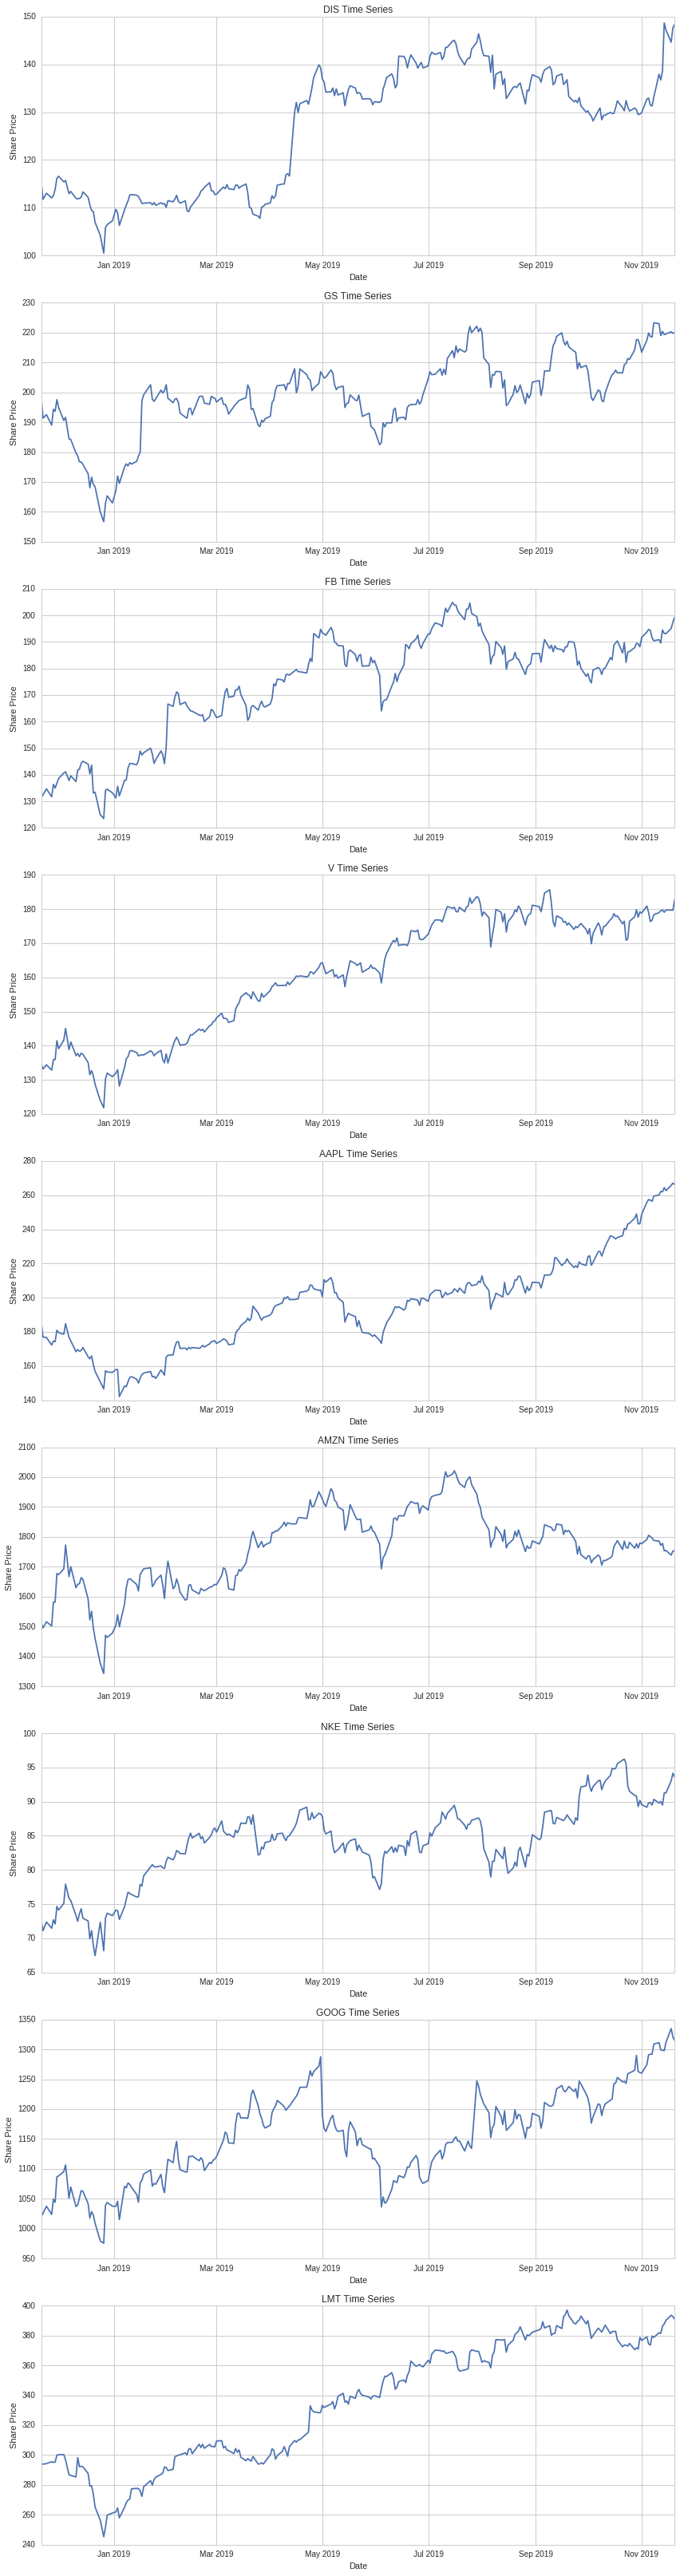

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 45))

# Plot individual line graphs of each stock's price
for i, ticker in enumerate(stock_choices):
    plt.subplot(len(stock_choices), 1, (i+1))
    plt.title(ticker + " Time Series")
    plt.xlabel('Date')
    plt.ylabel('Share Price')
    
    stock_price = simulation_df.loc[(slice(None), symbols(ticker)), 'Price']
    plt.plot(simulation_df.index.get_level_values(0)[::len(stock_choices)], stock_price)
#     SimpleMovingAverage(inputs=stock_price, window_length=5)
#     SimpleMovingAverage(inputs=stock_price, window_length=20)
        
plt.tight_layout()